## ROC Plot ##

In [1]:
# Import required modules
import sys
from pathlib import Path

In [2]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.analysis import roc_plot
from src.analysis.efficiency_analysis import load_preprocessed_jobs_dataframe_from_duckdb
from src.config import enum_constants

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.roc_plot, src.config.enum_constants, src.analysis.efficiency_analysis

In [4]:
# load jobs df
loaded_df = load_preprocessed_jobs_dataframe_from_duckdb(db_path="../data/slurm_data_small.db")

Connected to ../data/slurm_data_small.db
Disconnected from ../data/slurm_data_small.db


In [5]:
# initilize the ROCVisualizer instance
roc_instance = roc_plot.ROCVisualizer(jobs_df=loaded_df)

# clip vram_constraint_efficiency to 1

# filter out CPU-only job
filtered_df = roc_instance.filter_jobs_for_analysis(
    gpu_count_filter={"min": 0, "max": float("inf"), "inclusive": False},
    elapsed_seconds_min=0)

# calcualted dataframe with metrics
roc_instance.calculate_all_efficiency_metrics(filtered_df)



{'jobs_with_efficiency_metrics':           JobID  ArrayID                                           JobName  \
 20     28982142       -1                                                p3   
 21     28989215       -1               inference_user_query_review_full.sh   
 22     29004768       -1  nf-COLABFOLD_COLABFOLD_BATCH_(O64948-A0A1P8AT95)   
 23     29004931       -1  nf-COLABFOLD_COLABFOLD_BATCH_(O64948-A0A1P8AUH4)   
 24     29004942       -1      nf-COLABFOLD_COLABFOLD_BATCH_(O64948-F4K5Y4)   
 ...         ...      ...                                               ...   
 34195  29060367       -1                                      sedd_gpu_job   
 34196  29021870       -1      nf-COLABFOLD_COLABFOLD_BATCH_(O64948-P49047)   
 34197  29022166       -1  nf-COLABFOLD_COLABFOLD_BATCH_(O64948-A0A1P8BBW3)   
 34198  29021871       -1      nf-COLABFOLD_COLABFOLD_BATCH_(O64948-P49062)   
 34199  29022202       -1      nf-COLABFOLD_COLABFOLD_BATCH_(O64948-C0Z324)   
 
        IsArray   

### Threshold: alloc_vram_efficiency ###

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


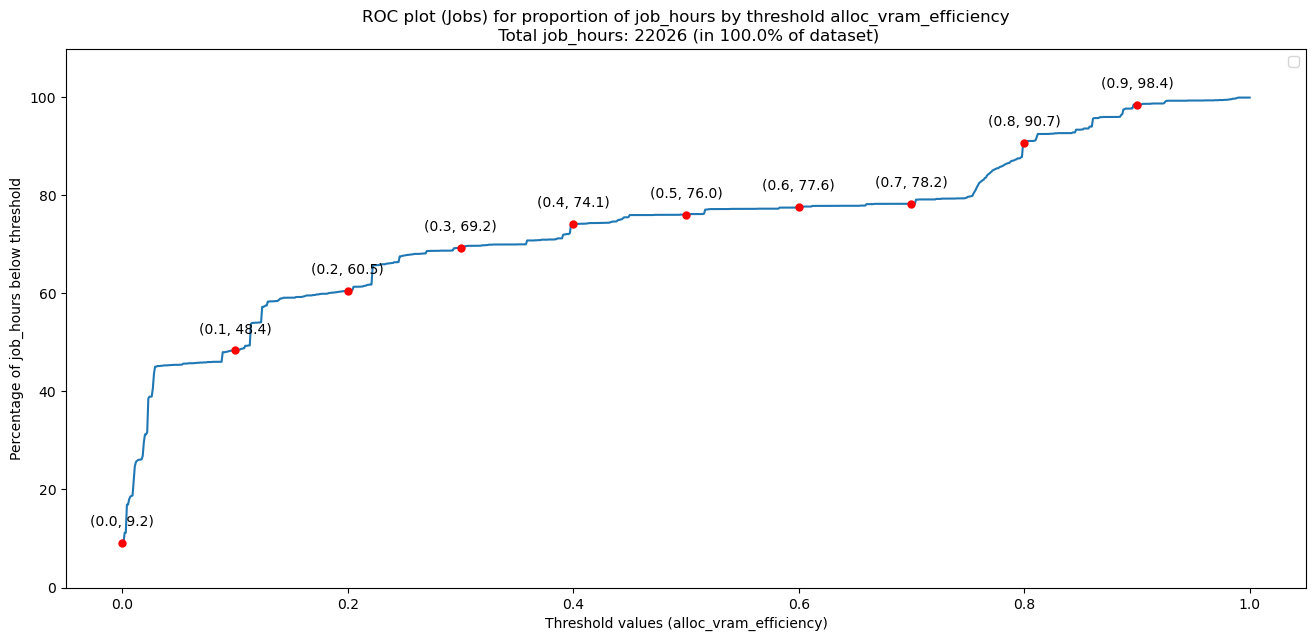

In [6]:
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

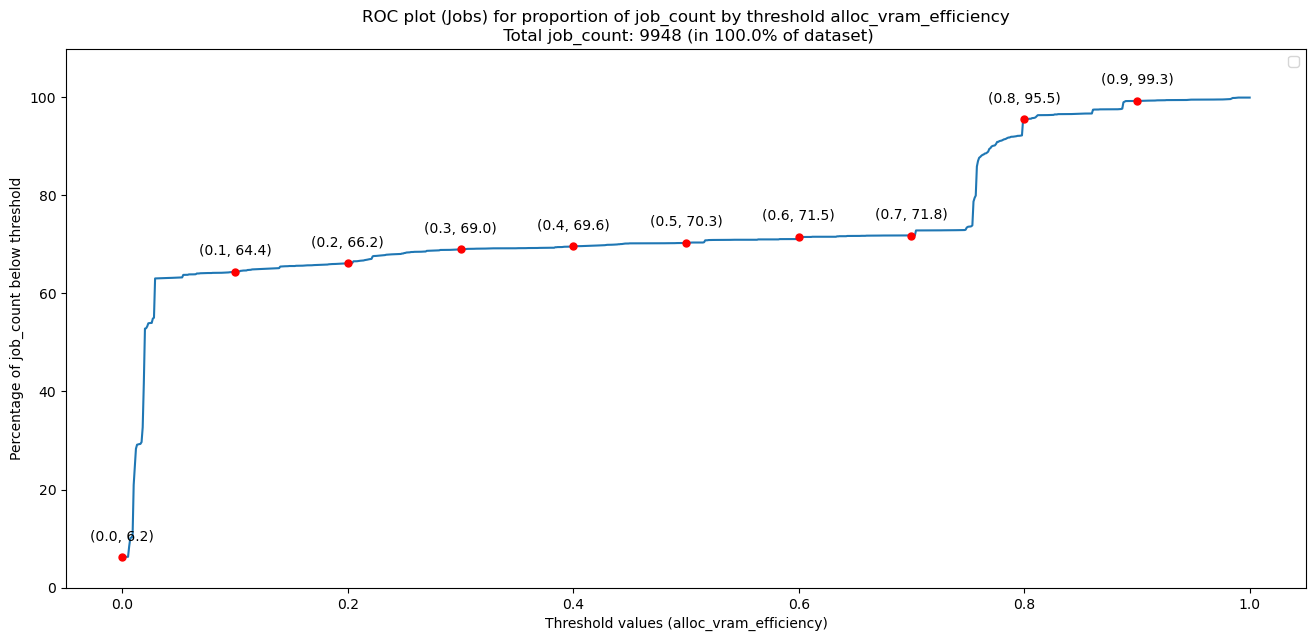

In [7]:
# plot number of jobs by percentage with regard to alloc_vram_effificient
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

In [8]:
# Inspect jump jobs
temp = roc_instance.jobs_with_efficiency_metrics
filtered = temp[(temp["alloc_vram_efficiency"] >= 0.75) & (temp["alloc_vram_efficiency"] <= 0.78)]
# print(len(filtered))
# print(len(filtered["JobID"].unique()))
# print(filtered["GPUType"].value_counts())
# filtered
# filtered["User"].unique()
filtered["vram_constraint"].value_counts()


vram_constraint
48    1
Name: count, dtype: Int64

(array([ 12., 577., 748., 107.,  44.,  39., 103.,  24.,  71.,  27.]),
 array([0.75      , 0.75299784, 0.75599569, 0.75899353, 0.76199137,
        0.76498922, 0.76798706, 0.7709849 , 0.77398275, 0.77698059,
        0.77997843]),
 <BarContainer object of 10 artists>)

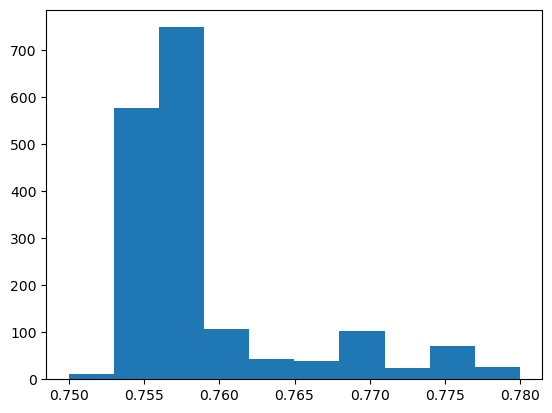

In [9]:
import matplotlib.pyplot as plt
plt.hist(filtered["alloc_vram_efficiency"])

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


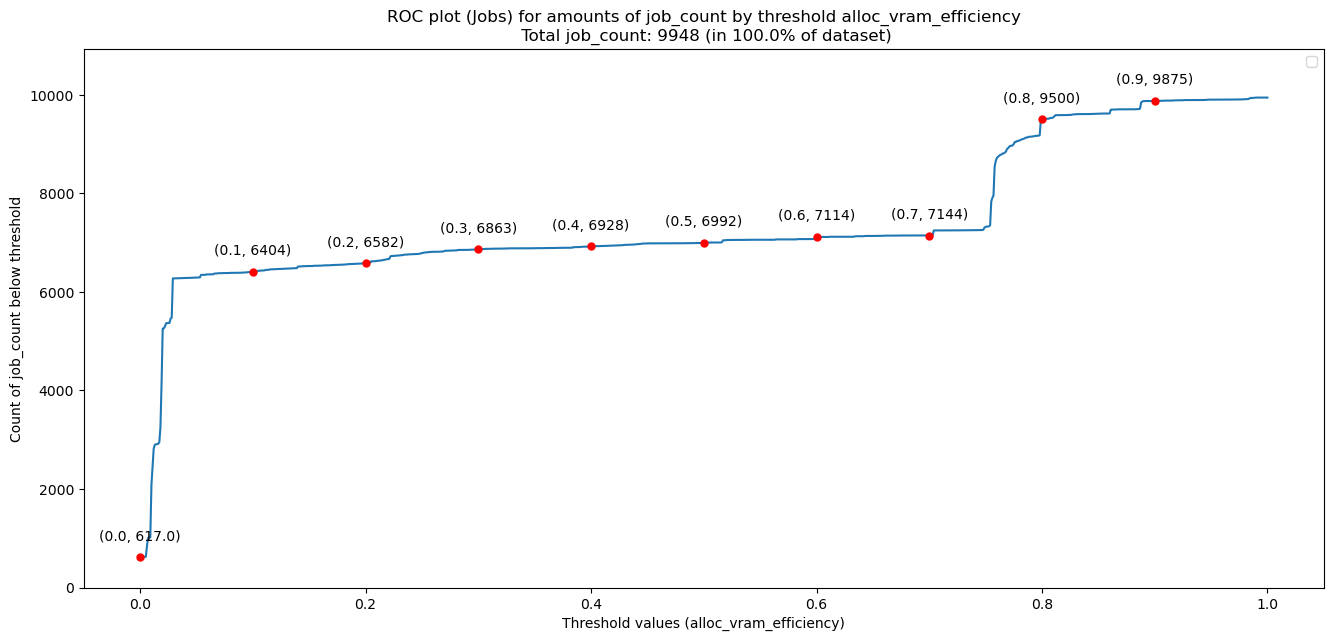

In [10]:
# plot raw numbers of jobs
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


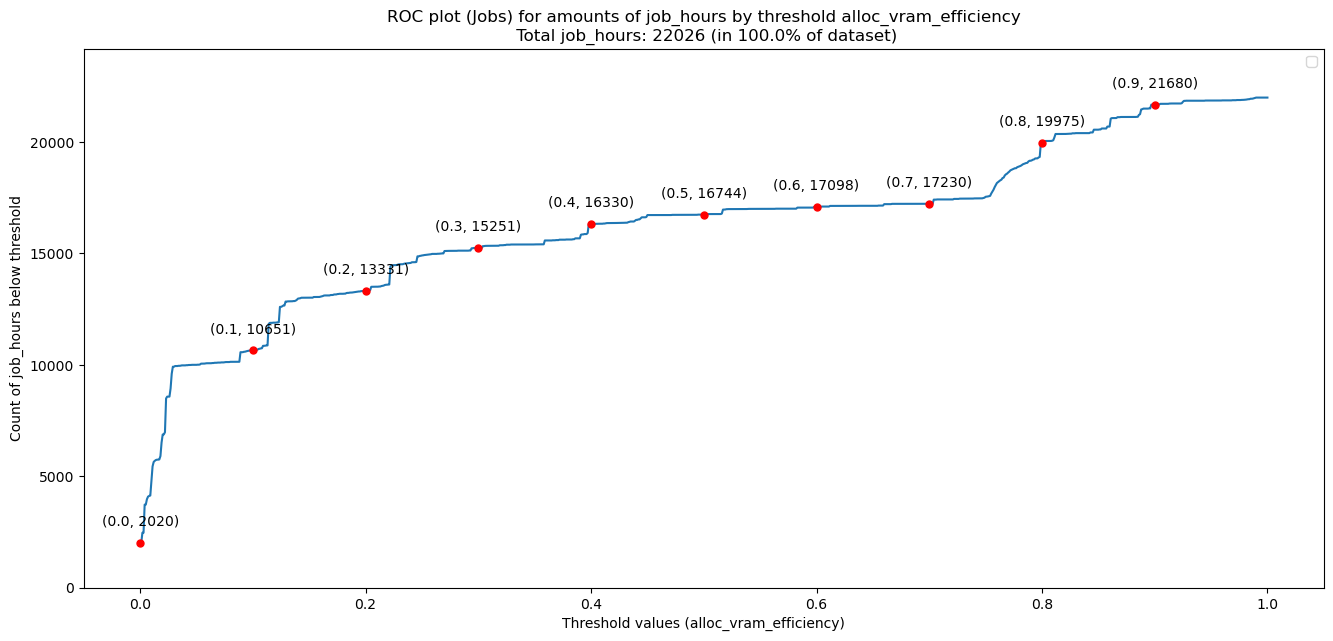

In [11]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Threshold : vram_constraints_efficiency ###

In [12]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
df = roc_instance.jobs_with_efficiency_metrics
len(df[df[threshold_metric.value].isna()])

3987

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


Filtered out 3987 invalid records based on vram_constraint_efficiency column.


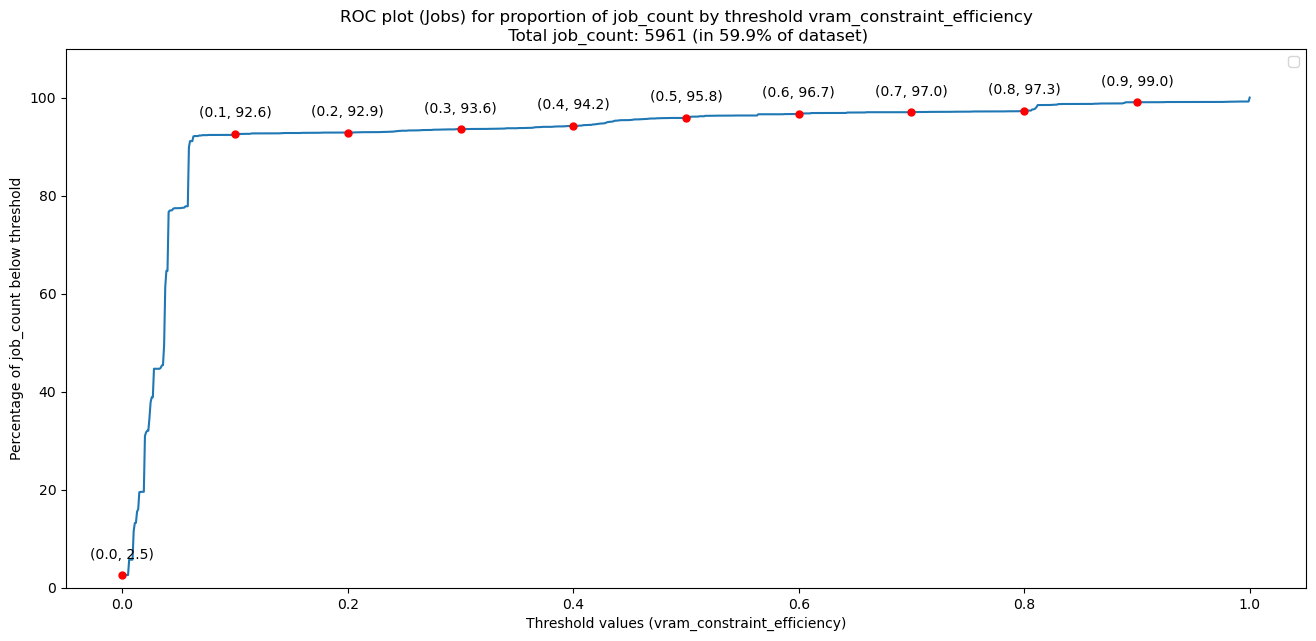

In [13]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric,
    clip_threshold_metric=(True, 1.0)
)

Filtered out 3987 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


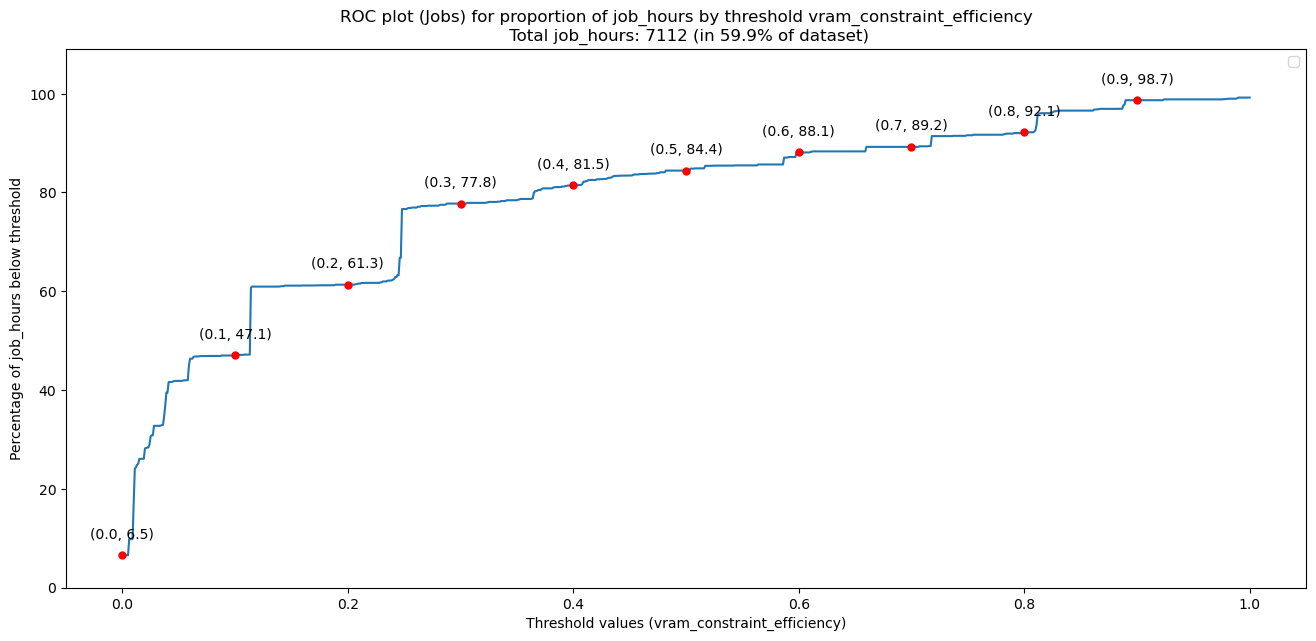

In [14]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threshold : alloc_vram_efficiency_score ###

In [15]:
# # roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")


Filtered out 617 invalid records based on alloc_vram_efficiency_score column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


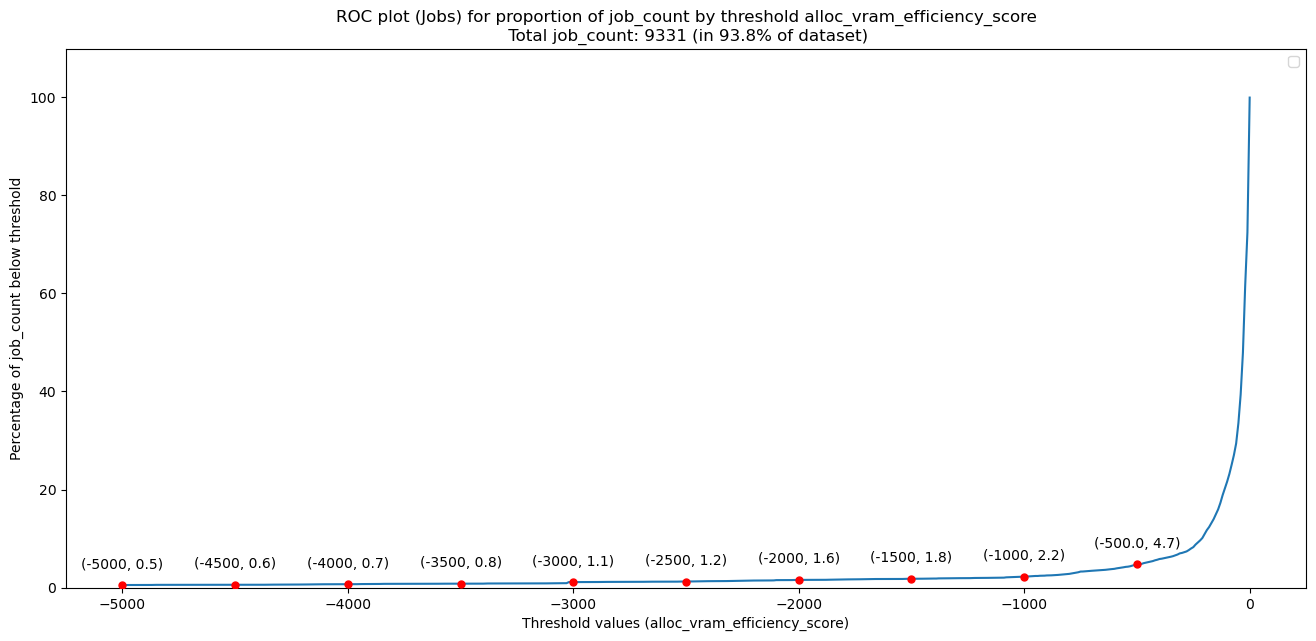

In [16]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [17]:
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].mean())
print(roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].std())
roc_instance.jobs_with_efficiency_metrics[enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE.value].max()

-inf
<NA>


np.float64(26.51397951182156)

Filtered out 617 invalid records based on alloc_vram_efficiency_score column.
Setting min_threshold to -925815.4587049824 based on data.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


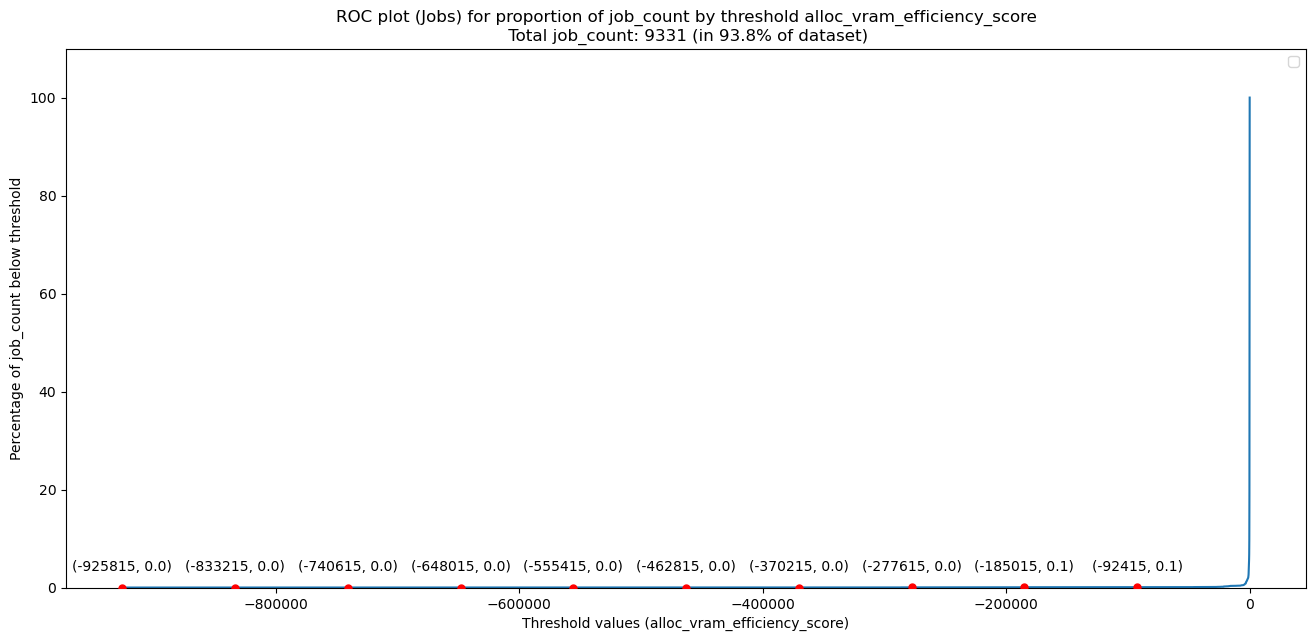

In [18]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=100,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Threhold metric: Job_hour & vram_hour (For number of jobs only) ###

In [19]:
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["job_hours"].min())

2.214116768306304
19.189762306507856
1248.0011111111112
0.001388888888888889


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


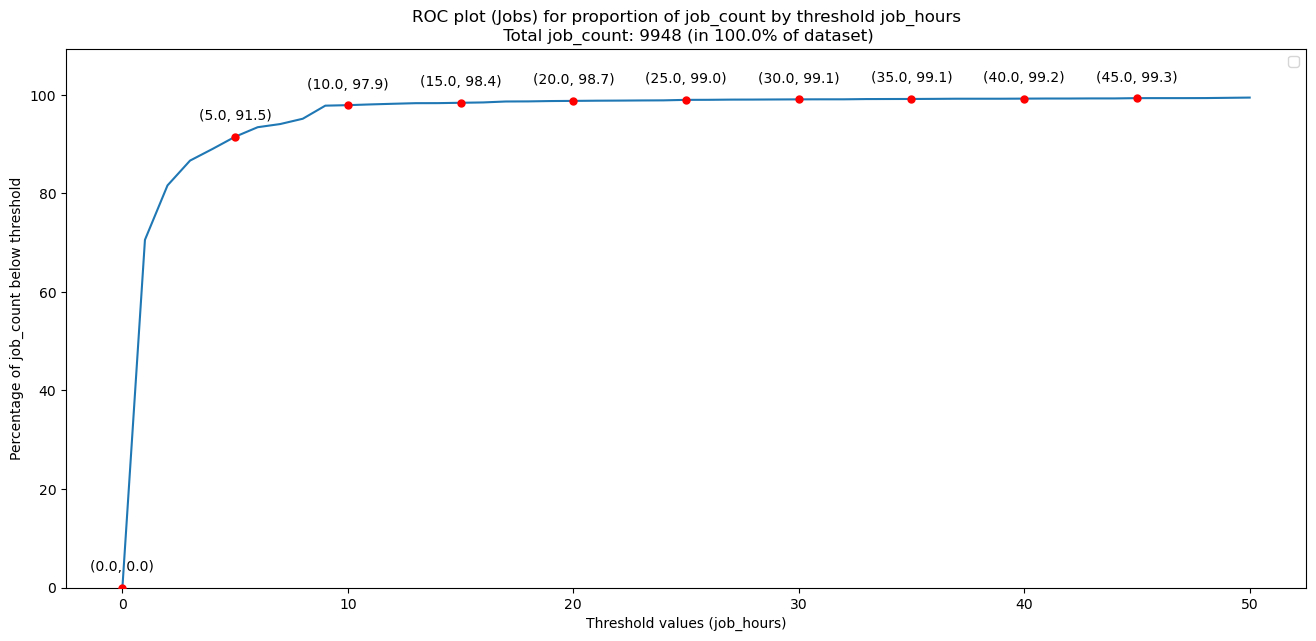

In [20]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.JOB_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=50,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

In [21]:
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].mean())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].std())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].max())
print(roc_instance.jobs_with_efficiency_metrics["vram_hours"].min())

192.1793606475897
4820.820821537342
442760.5333333334
0.015277777777777779


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


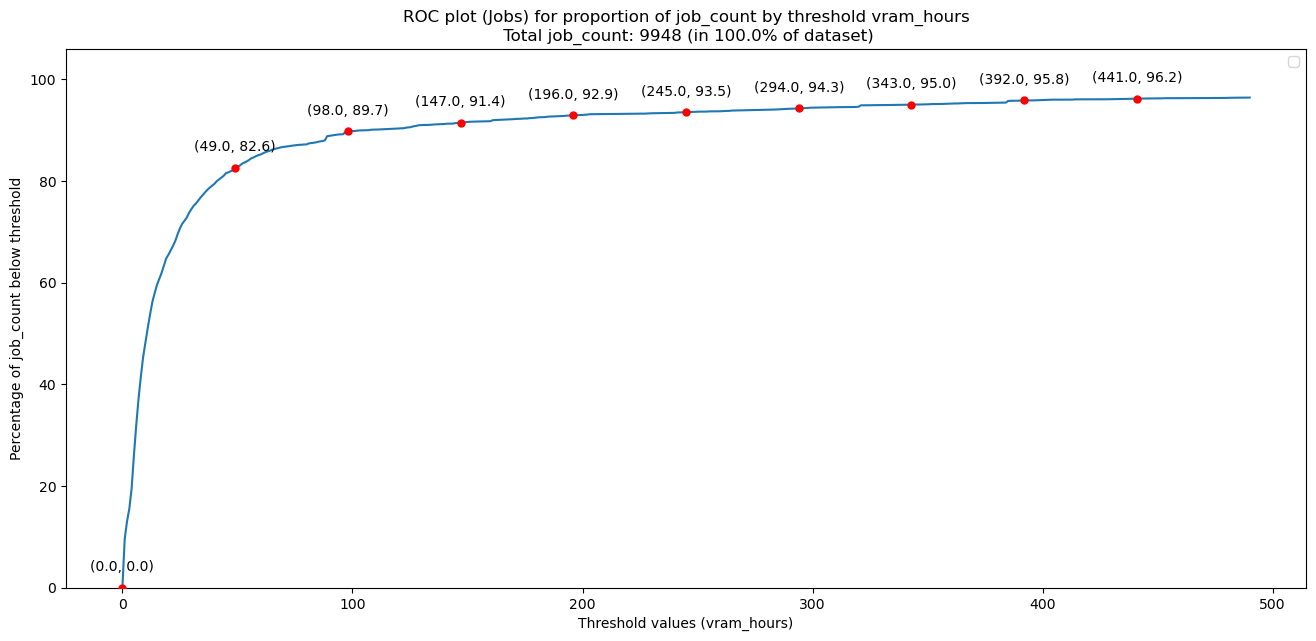

In [22]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
max_job_hour = roc_instance.jobs_with_efficiency_metrics["job_hours"].max()
fig, (axe1) = roc_instance.plot_roc_jobs(
    # min_threshold=-200000,
    min_threshold=0.0,
    max_threshold=490,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

### Proportion metric : User ###

In [23]:
null_alloc_vram_efficiency_score = roc_instance.jobs_with_efficiency_metrics[
    roc_instance.jobs_with_efficiency_metrics["alloc_vram_efficiency"].isna()
]

print(
    null_alloc_vram_efficiency_score[
        ["used_vram_gib", "allocated_vram", "alloc_vram_efficiency", "Partition", "GPUType"]
    ]
)

Empty DataFrame
Columns: [used_vram_gib, allocated_vram, alloc_vram_efficiency, Partition, GPUType]
Index: []


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


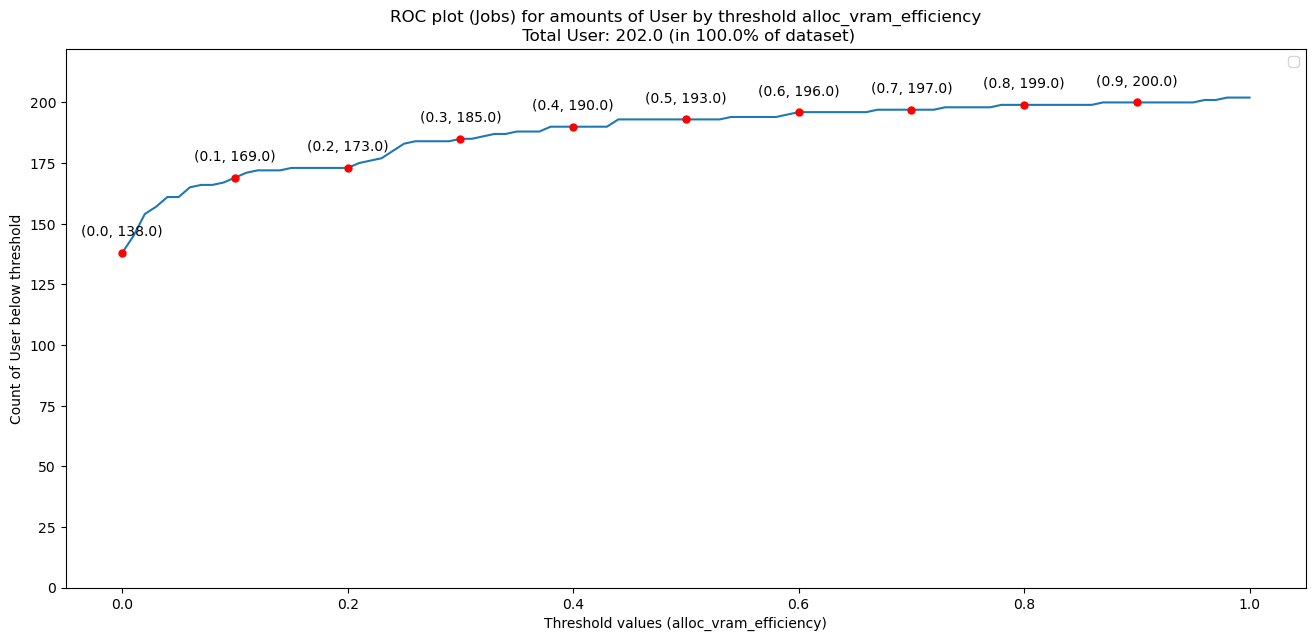

In [24]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

In [25]:
user_with_all_vram_score_null = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
user_with_all_vram_score_null

np.int64(143)

Filtered out 3987 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


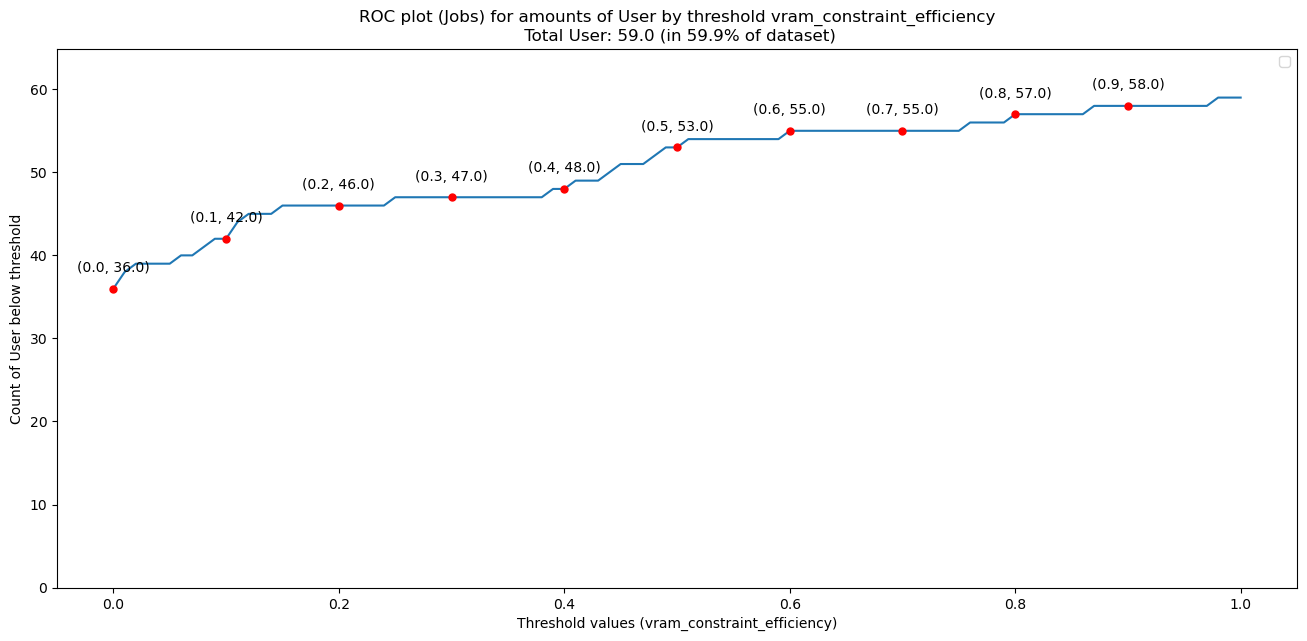

In [26]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


Filtered out 617 invalid records based on alloc_vram_efficiency_score column.


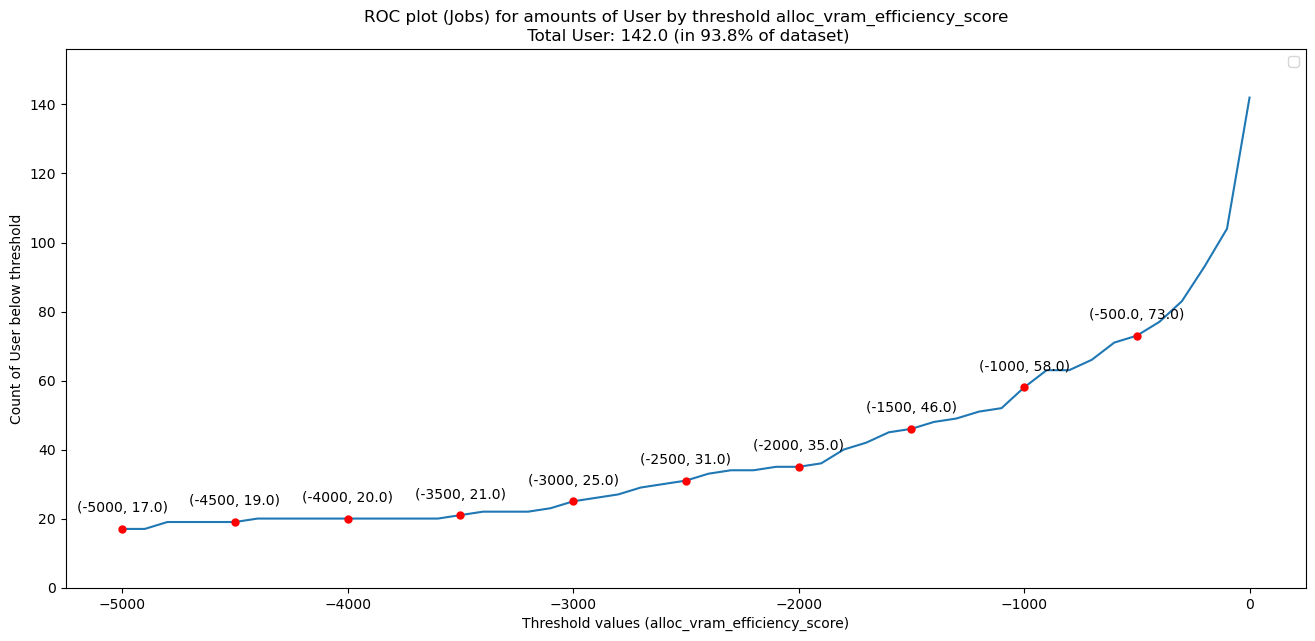

In [27]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.USERS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=100,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

### Proportion Metrics: PI_GROUP ###

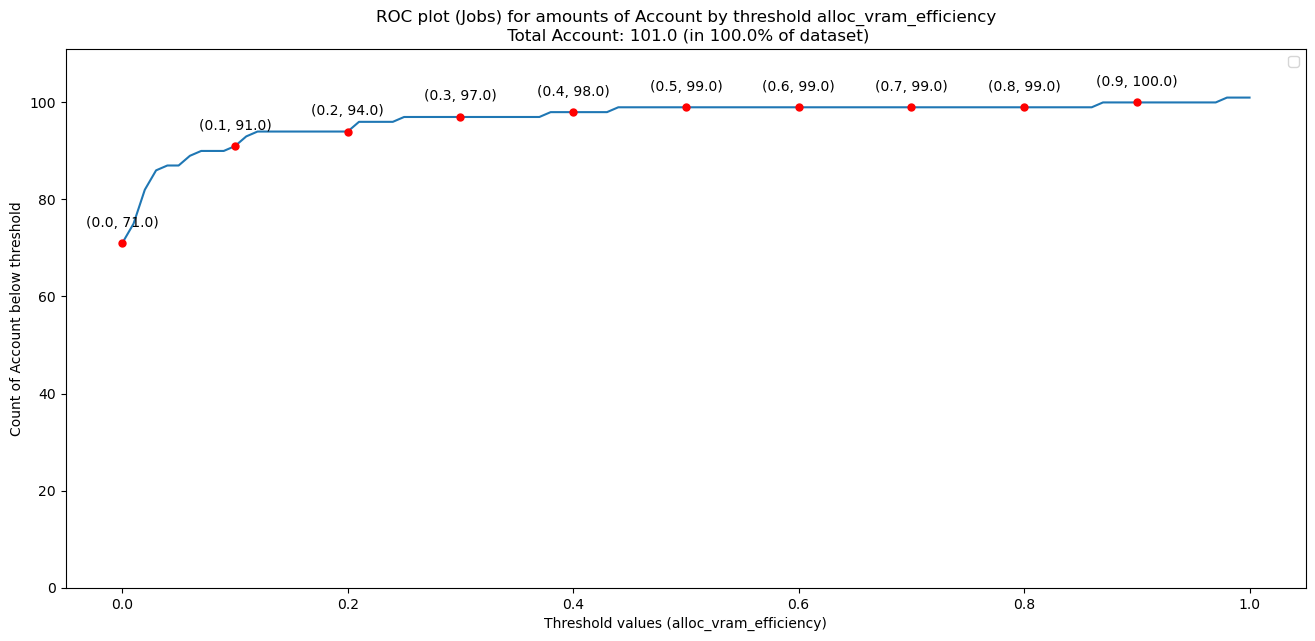

In [28]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

In [29]:
temp = (
    roc_instance.jobs_with_efficiency_metrics.groupby("Account", observed=True)["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
temp

np.int64(60)

Filtered out 3987 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


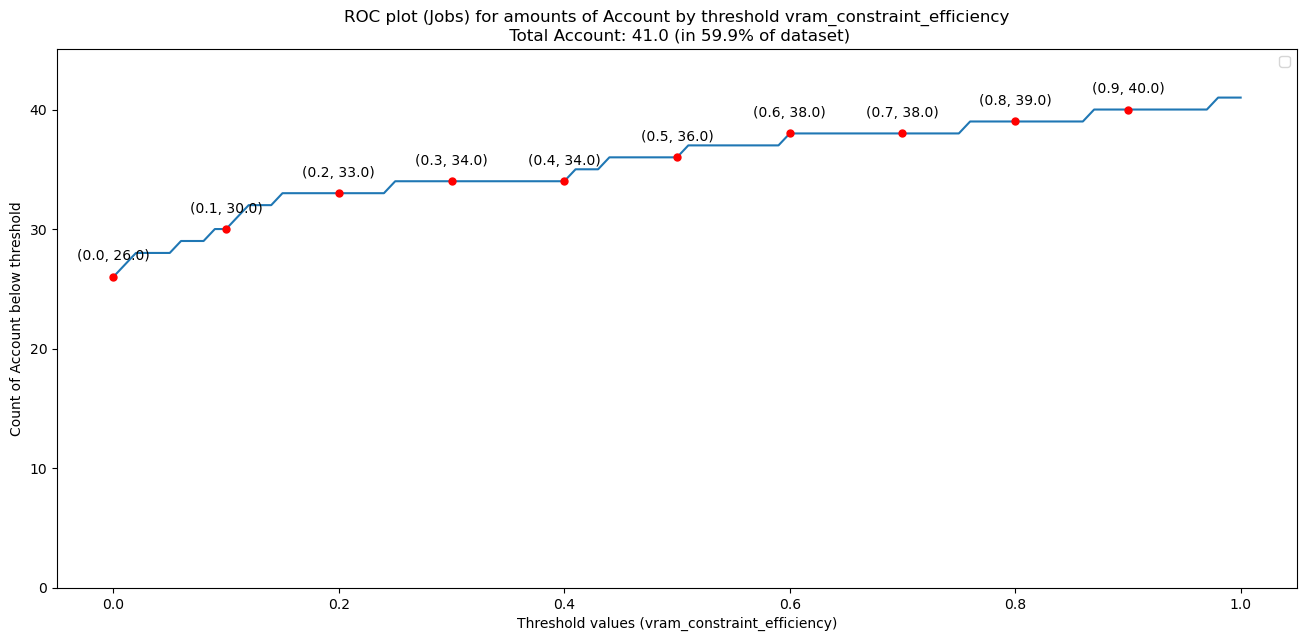

In [30]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


Filtered out 617 invalid records based on alloc_vram_efficiency_score column.


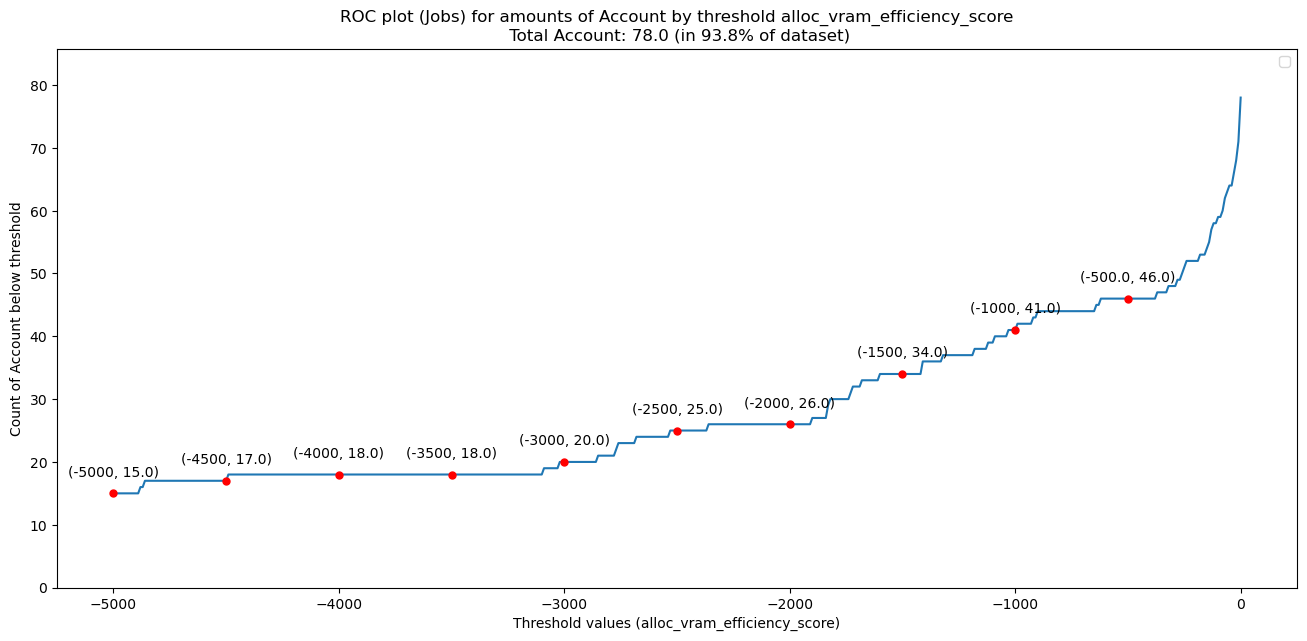

In [31]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS
fig, (axe1) = roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)

### Proportion Metrics: VRAM_HOURS ###

Filtered out 3987 invalid records based on vram_constraint_efficiency column.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot (Jobs) for proportion of vram_hours by threshold vram_constraint_efficiency\n Total vram_hours: 884441 (in 59.9% of dataset)'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

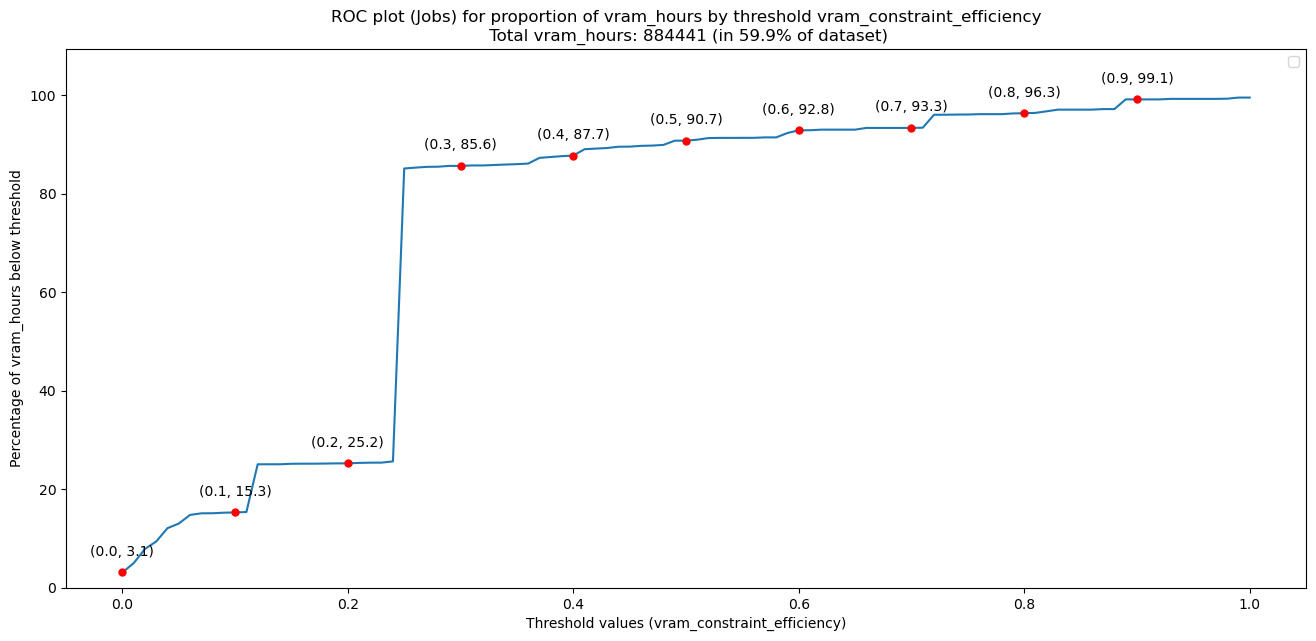

In [32]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot (Jobs) for proportion of vram_hours by threshold alloc_vram_efficiency\n Total vram_hours: 1.9e+06 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

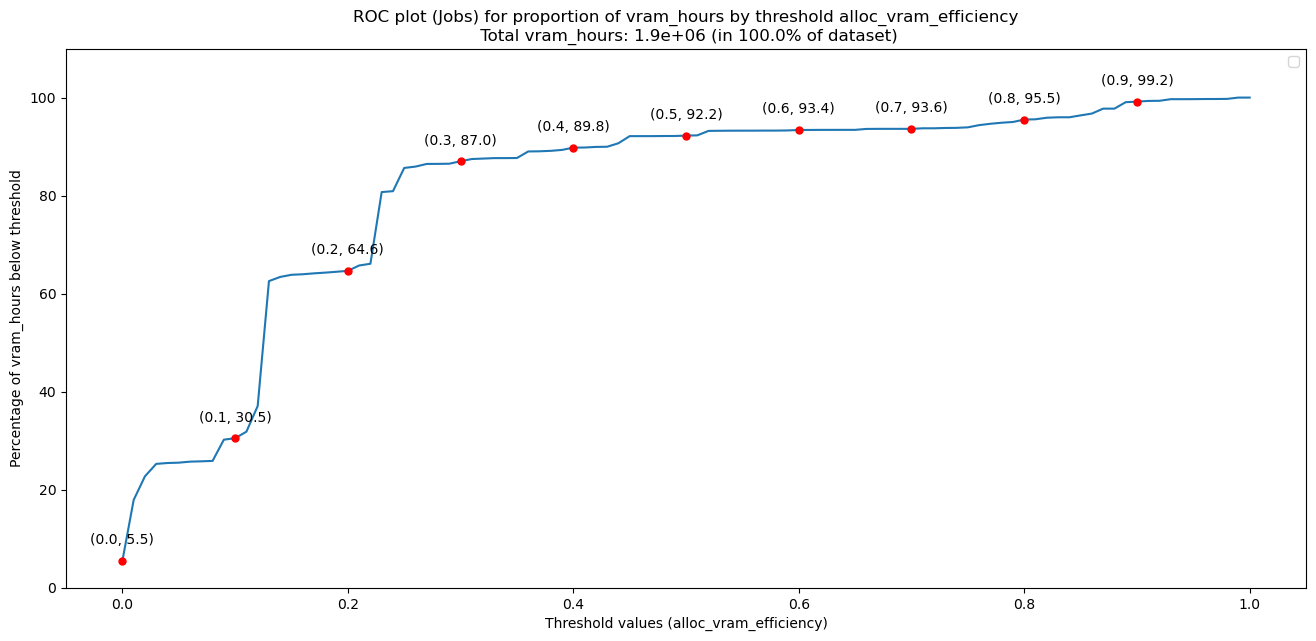

In [33]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


Filtered out 617 invalid records based on alloc_vram_efficiency_score column.
Setting min_threshold to -925815.4587049824 based on data.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py:561: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot (Jobs) for proportion of vram_hours by threshold alloc_vram_efficiency_score\n Total vram_hours: 1.8e+06 (in 93.8% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Percentage of vram_hours below threshold'>])

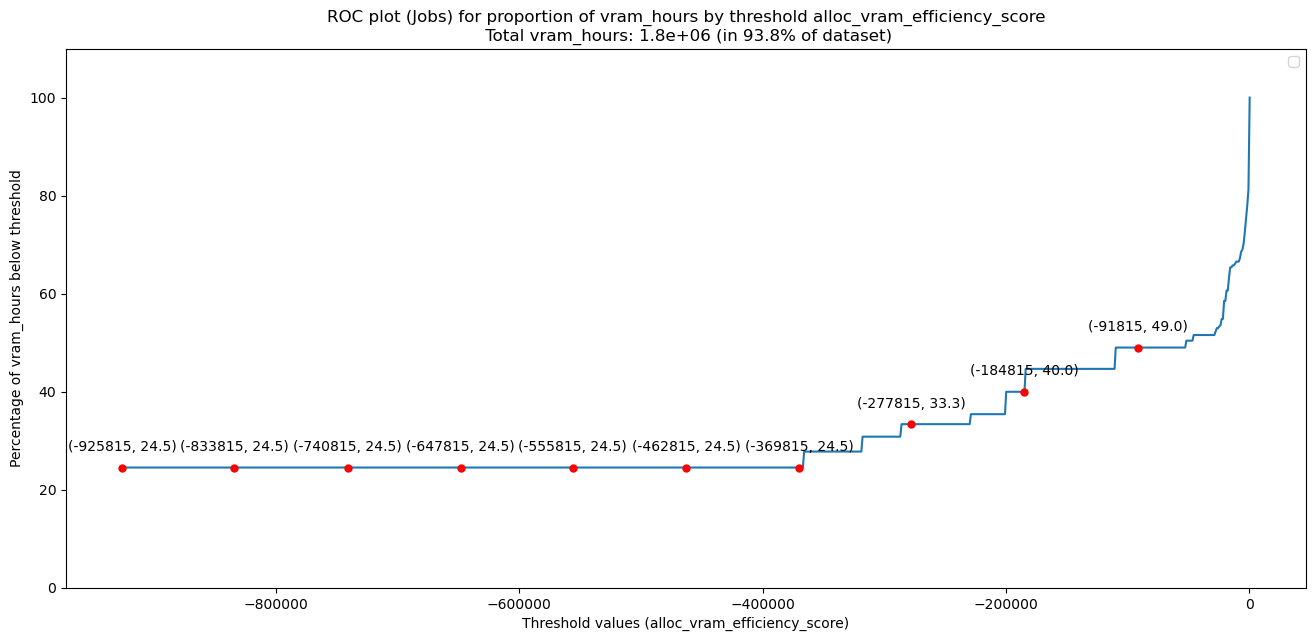

In [34]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc_jobs(
    max_threshold=0.0,
    # min_threshold=-200000.0,
    threshold_step=1000,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)


## Multiple line plot by user ###

#### Inspect 6 users who submitted the highest number of jobs ####

In [35]:
top_user_with_job_count = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), user_job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
print(top_user_with_job_count)

                      User  job_count  user_job_hours
84          jroh_umass_edu        195      100.400833
187   yekyungkim_umass_edu        253     1063.280278
15   allen_yang001_umb_edu        432      813.741944
56     emccleary_umass_edu        891     1297.170833
81     joohwanko_umass_edu       1890     1880.063056
130       pchien_umass_edu       4451     1527.904167


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_count by threshold alloc_vram_efficiency\n Total job_count: 9948 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_count below threshold'>])

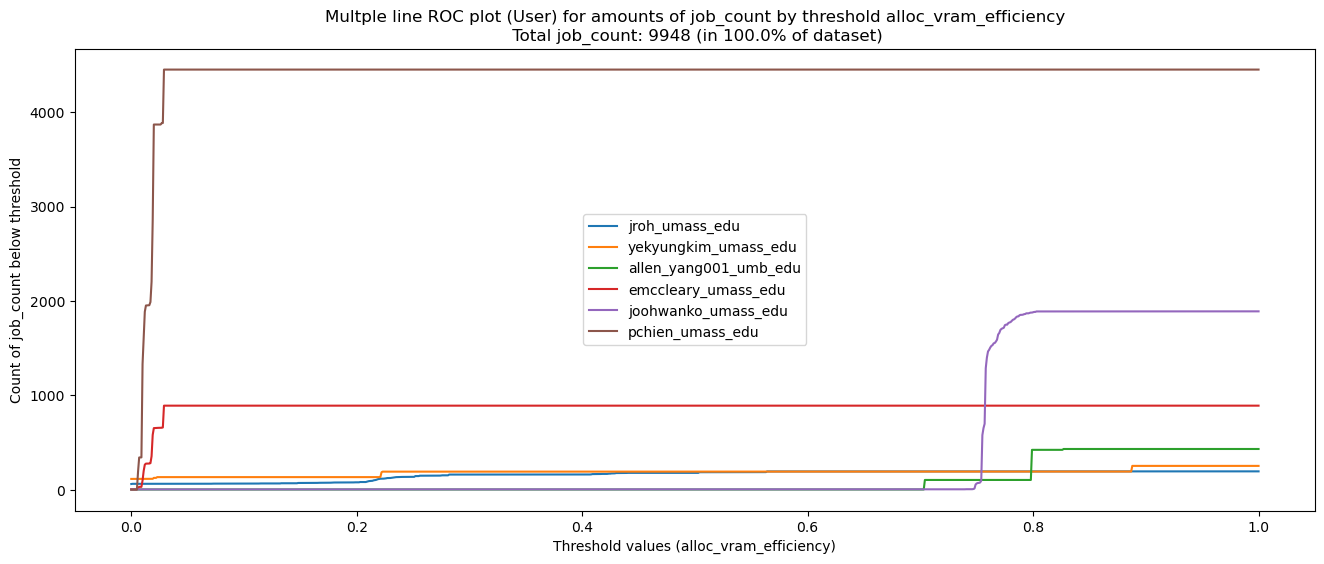

In [36]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Filtered out 617 invalid records based on alloc_vram_efficiency_score column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_count by threshold alloc_vram_efficiency_score\n Total job_count: 9331 (in 93.8% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of job_count below threshold'>])

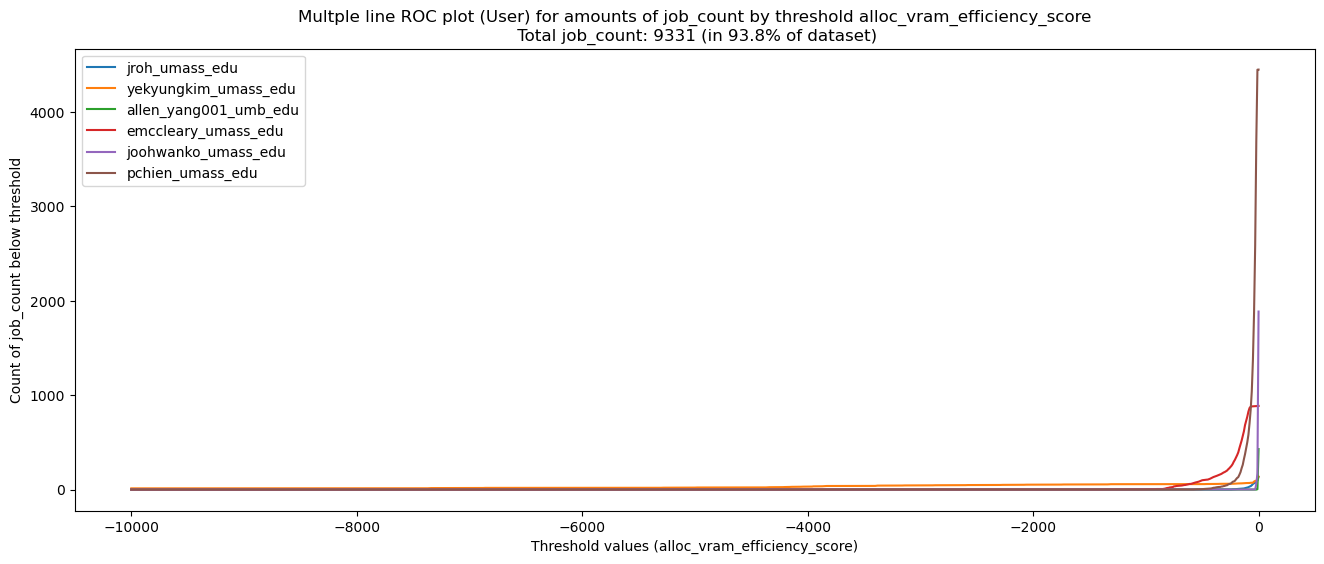

In [37]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=10,
    plot_percentage=False,
)

Filtered out 3987 invalid records based on vram_constraint_efficiency column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_count by threshold vram_constraint_efficiency\n Total job_count: 5961 (in 59.9% of dataset)'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of job_count below threshold'>])

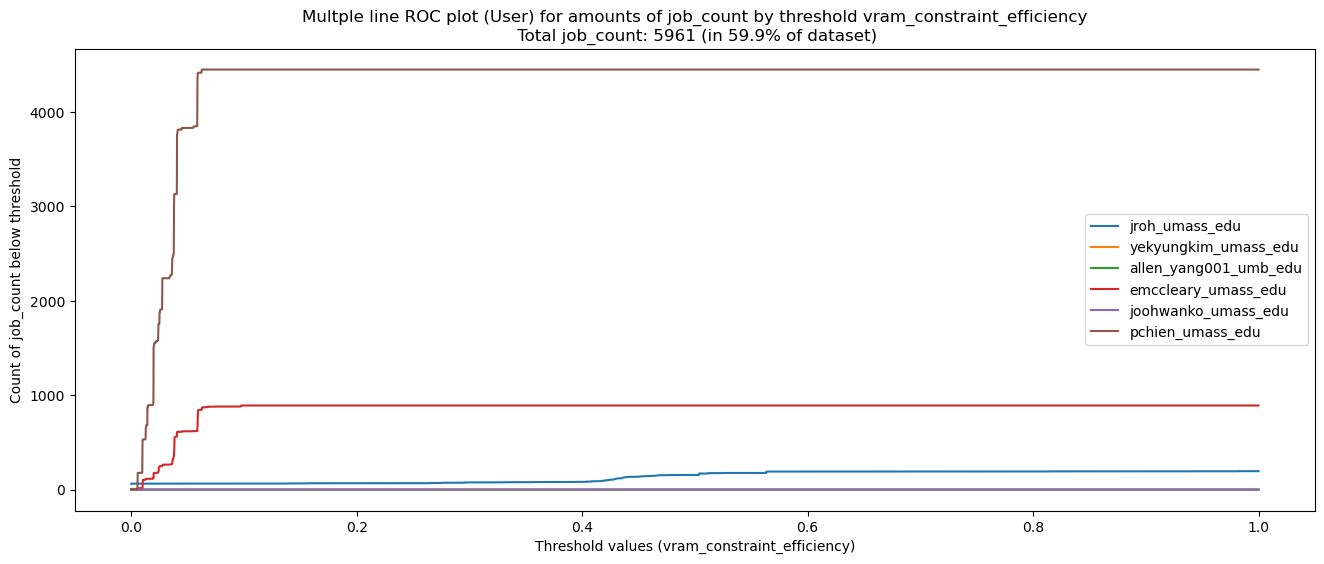

In [38]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    # plot_object_list=['dosterman_umass_edu'],
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    plot_percentage=False,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.0001,
)

In [39]:
# Inspect an outliner
cur_df = roc_instance.jobs_with_efficiency_metrics.copy()
filtered = cur_df[cur_df["User"] == "dosterman_umass_edu"].copy()
group = (
    filtered.groupby("User")
    .agg(
        job_count=("JobID", "count"),
        job_hours=("job_hours", "sum"),
        vram_efficiency_score=(JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY.value, "sum"),
        allocated_vram=("allocated_vram", "sum"),
        used_vram=("used_vram_gib", "sum"),
    )
    .reset_index()
)
print(group)

Empty DataFrame
Columns: [User, job_count, job_hours, vram_efficiency_score, allocated_vram, used_vram]
Index: []


#### Inspect the 6 users with highest number of job_hours ####

In [40]:
top_user_by_job_hour = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_hours")
    .tail(6)
)
print(top_user_by_job_hour)

                          User  job_count    job_hours
187       yekyungkim_umass_edu        253  1063.280278
56         emccleary_umass_edu        891  1297.170833
10       achyut_subedi_uri_edu          8      1325.71
130           pchien_umass_edu       4451  1527.904167
73   jacob_adamczyk001_umb_edu         25  1680.179167
81         joohwanko_umass_edu       1890  1880.063056


Filtered out 3987 invalid records based on vram_constraint_efficiency column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold vram_constraint_efficiency\n Total job_hours: 7112 (in 59.9% of dataset)'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of job_hours below threshold'>])

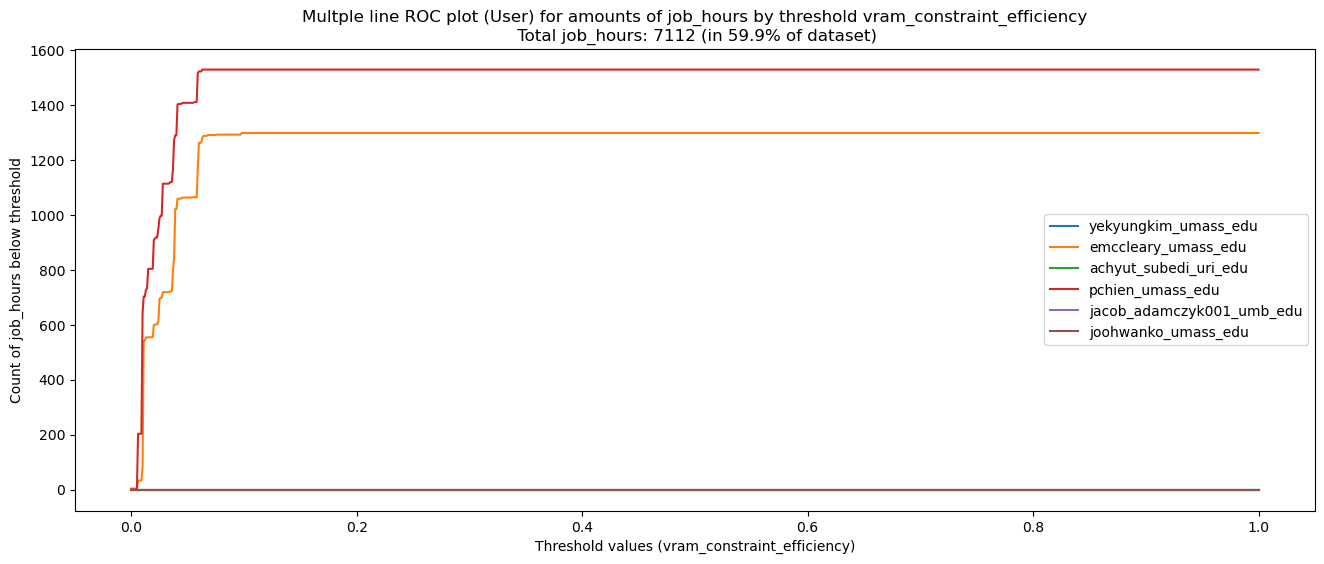

In [41]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold alloc_vram_efficiency\n Total job_hours: 22026 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_hours below threshold'>])

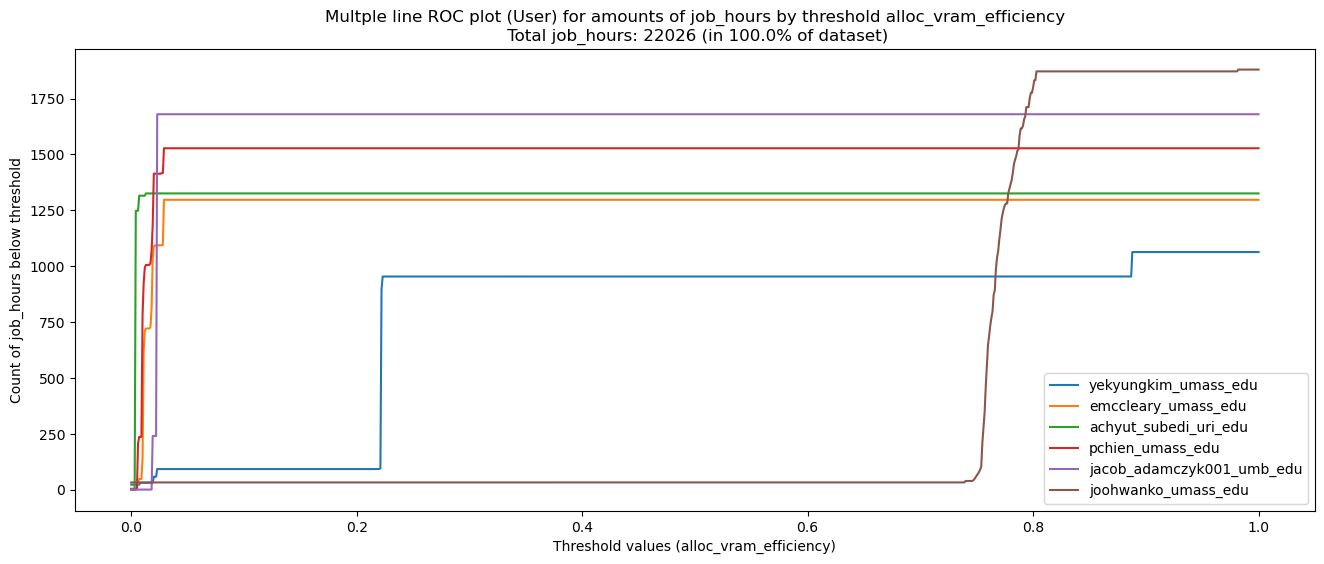

In [42]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USERS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

### Multiple plot ROC by PI Group ###

In [43]:
# from src.analysis.roc_plot import ROCVisualizer

# roc_instance = ROCVisualizer(db_path="../data/slurm_data.db")

In [44]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

cur_df = roc_instance.jobs_with_efficiency_metrics
top_pi_group_job_counts = (
    cur_df.groupby(ProportionMetricsEnum.PI_GROUPS.value)
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
top_pi_group_job_counts

/var/folders/fk/pzwkjjt962zdq9cqb2t9lz7m0000gn/T/ipykernel_30576/617810342.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur_df.groupby(ProportionMetricsEnum.PI_GROUPS.value)


,Account,job_count,job_hours
11,pi_ahoumansadr_umass_edu,232,377.781111
91,pi_miyyer_umass_edu,350,1569.730556
74,pi_bo_sheng_umb_edu,432,813.741944
21,pi_bioch642_umass_edu,891,1297.170833
39,pi_jdomke_umass_edu,1890,1880.063056
96,pi_pchien_umass_edu,4451,1527.904167


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of job_count by threshold alloc_vram_efficiency\n Total job_count: 9948 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_count below threshold'>])

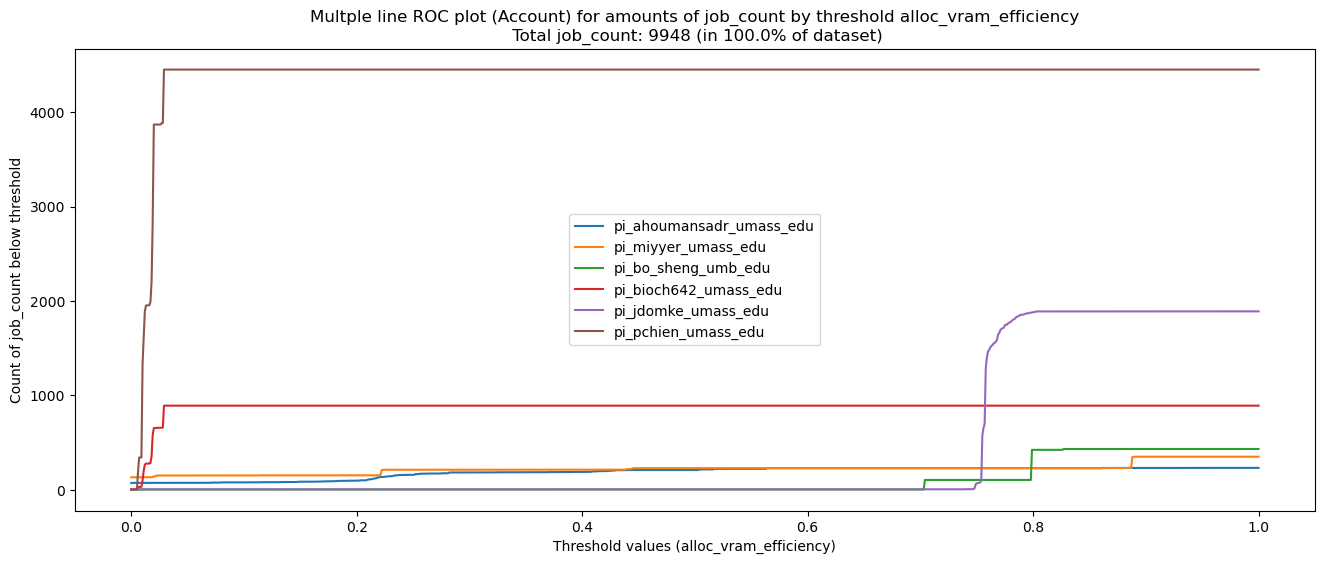

In [45]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUPS.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUPS,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Filtered out 617 invalid records based on alloc_vram_efficiency_score column.


(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of job_count by threshold alloc_vram_efficiency_score\n Total job_count: 9331 (in 93.8% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of job_count below threshold'>])

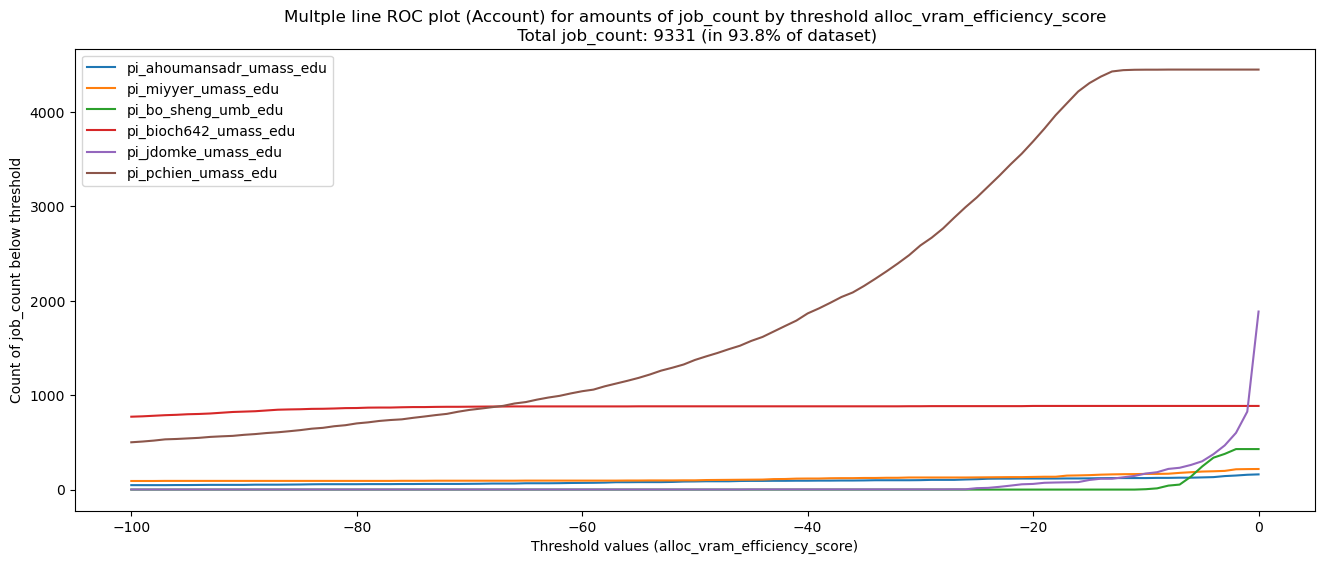

In [46]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUPS.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUPS,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    max_threshold=0.0,
    min_threshold=-100.0,
    threshold_step=1.0,
    plot_percentage=False,
)